In [1]:
import re
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nnahi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nnahi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
df = pd.read_csv('M:/resume-classifier/Resume/Resume.csv')
df.head()

ID                                         Resume_str  \
0  16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1  22323967           HR SPECIALIST, US HR OPERATIONS      ...   
2  33176873           HR DIRECTOR       Summary      Over 2...   
3  27018550           HR SPECIALIST       Summary    Dedica...   
4  17812897           HR MANAGER         Skill Highlights  ...   

                                         Resume_html Category  
0  <div class="fontsize fontface vmargins hmargin...       HR  
1  <div class="fontsize fontface vmargins hmargin...       HR  
2  <div class="fontsize fontface vmargins hmargin...       HR  
3  <div class="fontsize fontface vmargins hmargin...       HR  
4  <div class="fontsize fontface vmargins hmargin...       HR

In [3]:
df = df.drop(['ID', 'Resume_html'], axis=1)
df.head()

Resume_str Category
0           HR ADMINISTRATOR/MARKETING ASSOCIATE\...       HR
1           HR SPECIALIST, US HR OPERATIONS      ...       HR
2           HR DIRECTOR       Summary      Over 2...       HR
3           HR SPECIALIST       Summary    Dedica...       HR
4           HR MANAGER         Skill Highlights  ...       HR

# Preprocessing

In [4]:
STEMMER = nltk.stem.porter.PorterStemmer()

In [5]:
def process_string(full_text):
    """
    Process full data of resume and remove non-english links, characters, punctuation and numbers
    """
    full_text = full_text.lower()
    full_text = re.sub('[^a-zA-Z]', ' ', full_text)
    full_text = re.sub('http\S+\s*', ' ', full_text)
    tokenized_word_list = nltk.tokenize.word_tokenize(full_text)
    tokenized_word_list = [w for w in tokenized_word_list if not w in nltk.corpus.stopwords.words('english')]
    tokenized_word_list = [STEMMER.stem(w) for w in tokenized_word_list]

    return ' '.join(tokenized_word_list)

In [6]:
df['processed_text'] = df['Resume_str'].apply(lambda w: process_string(w))

In [7]:
df.head()

Resume_str Category  \
0           HR ADMINISTRATOR/MARKETING ASSOCIATE\...       HR   
1           HR SPECIALIST, US HR OPERATIONS      ...       HR   
2           HR DIRECTOR       Summary      Over 2...       HR   
3           HR SPECIALIST       Summary    Dedica...       HR   
4           HR MANAGER         Skill Highlights  ...       HR   

                                      processed_text  
0  hr administr market associ hr administr summar...  
1  hr specialist us hr oper summari versatil medi...  
2  hr director summari year experi recruit plu ye...  
3  hr specialist summari dedic driven dynam year ...  
4  hr manag skill highlight hr skill hr depart st...

In [8]:
df = df.drop(['Resume_str'], axis=1)
df.head()

Category                                     processed_text
0       HR  hr administr market associ hr administr summar...
1       HR  hr specialist us hr oper summari versatil medi...
2       HR  hr director summari year experi recruit plu ye...
3       HR  hr specialist summari dedic driven dynam year ...
4       HR  hr manag skill highlight hr skill hr depart st...

# EDA

In [9]:
df.describe()

Category  \
count                     2484   
unique                      24   
top     INFORMATION-TECHNOLOGY   
freq                       120   

                                           processed_text  
count                                                2484  
unique                                               2482  
top     storekeep ii profession summari purpos documen...  
freq                                                    2

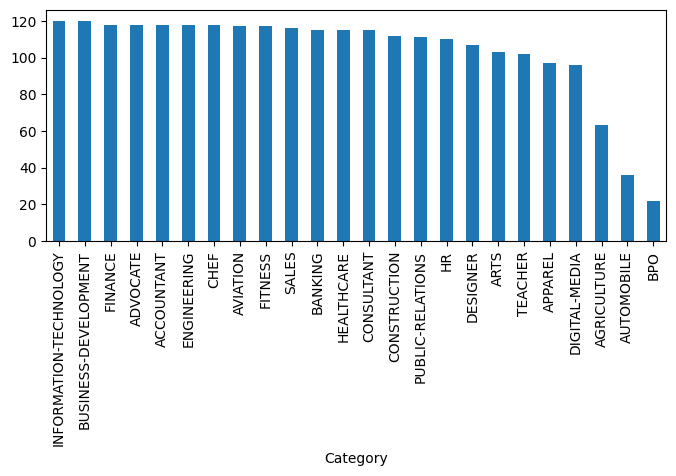

In [10]:
df['Category'].value_counts().plot(kind='bar', figsize=(8, 3))
plt.show()

In [119]:
categories = df['Category'].unique()
categories

array(['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION'],
      dtype=object)

In [12]:
from wordcloud import WordCloud

def generate_word_cloud(df):
    txt = ' '.join(txt for txt in df['processed_text'])
    word_cloud = WordCloud(
    ).generate(txt)
    # image = wordcloud.to_image()

    return word_cloud

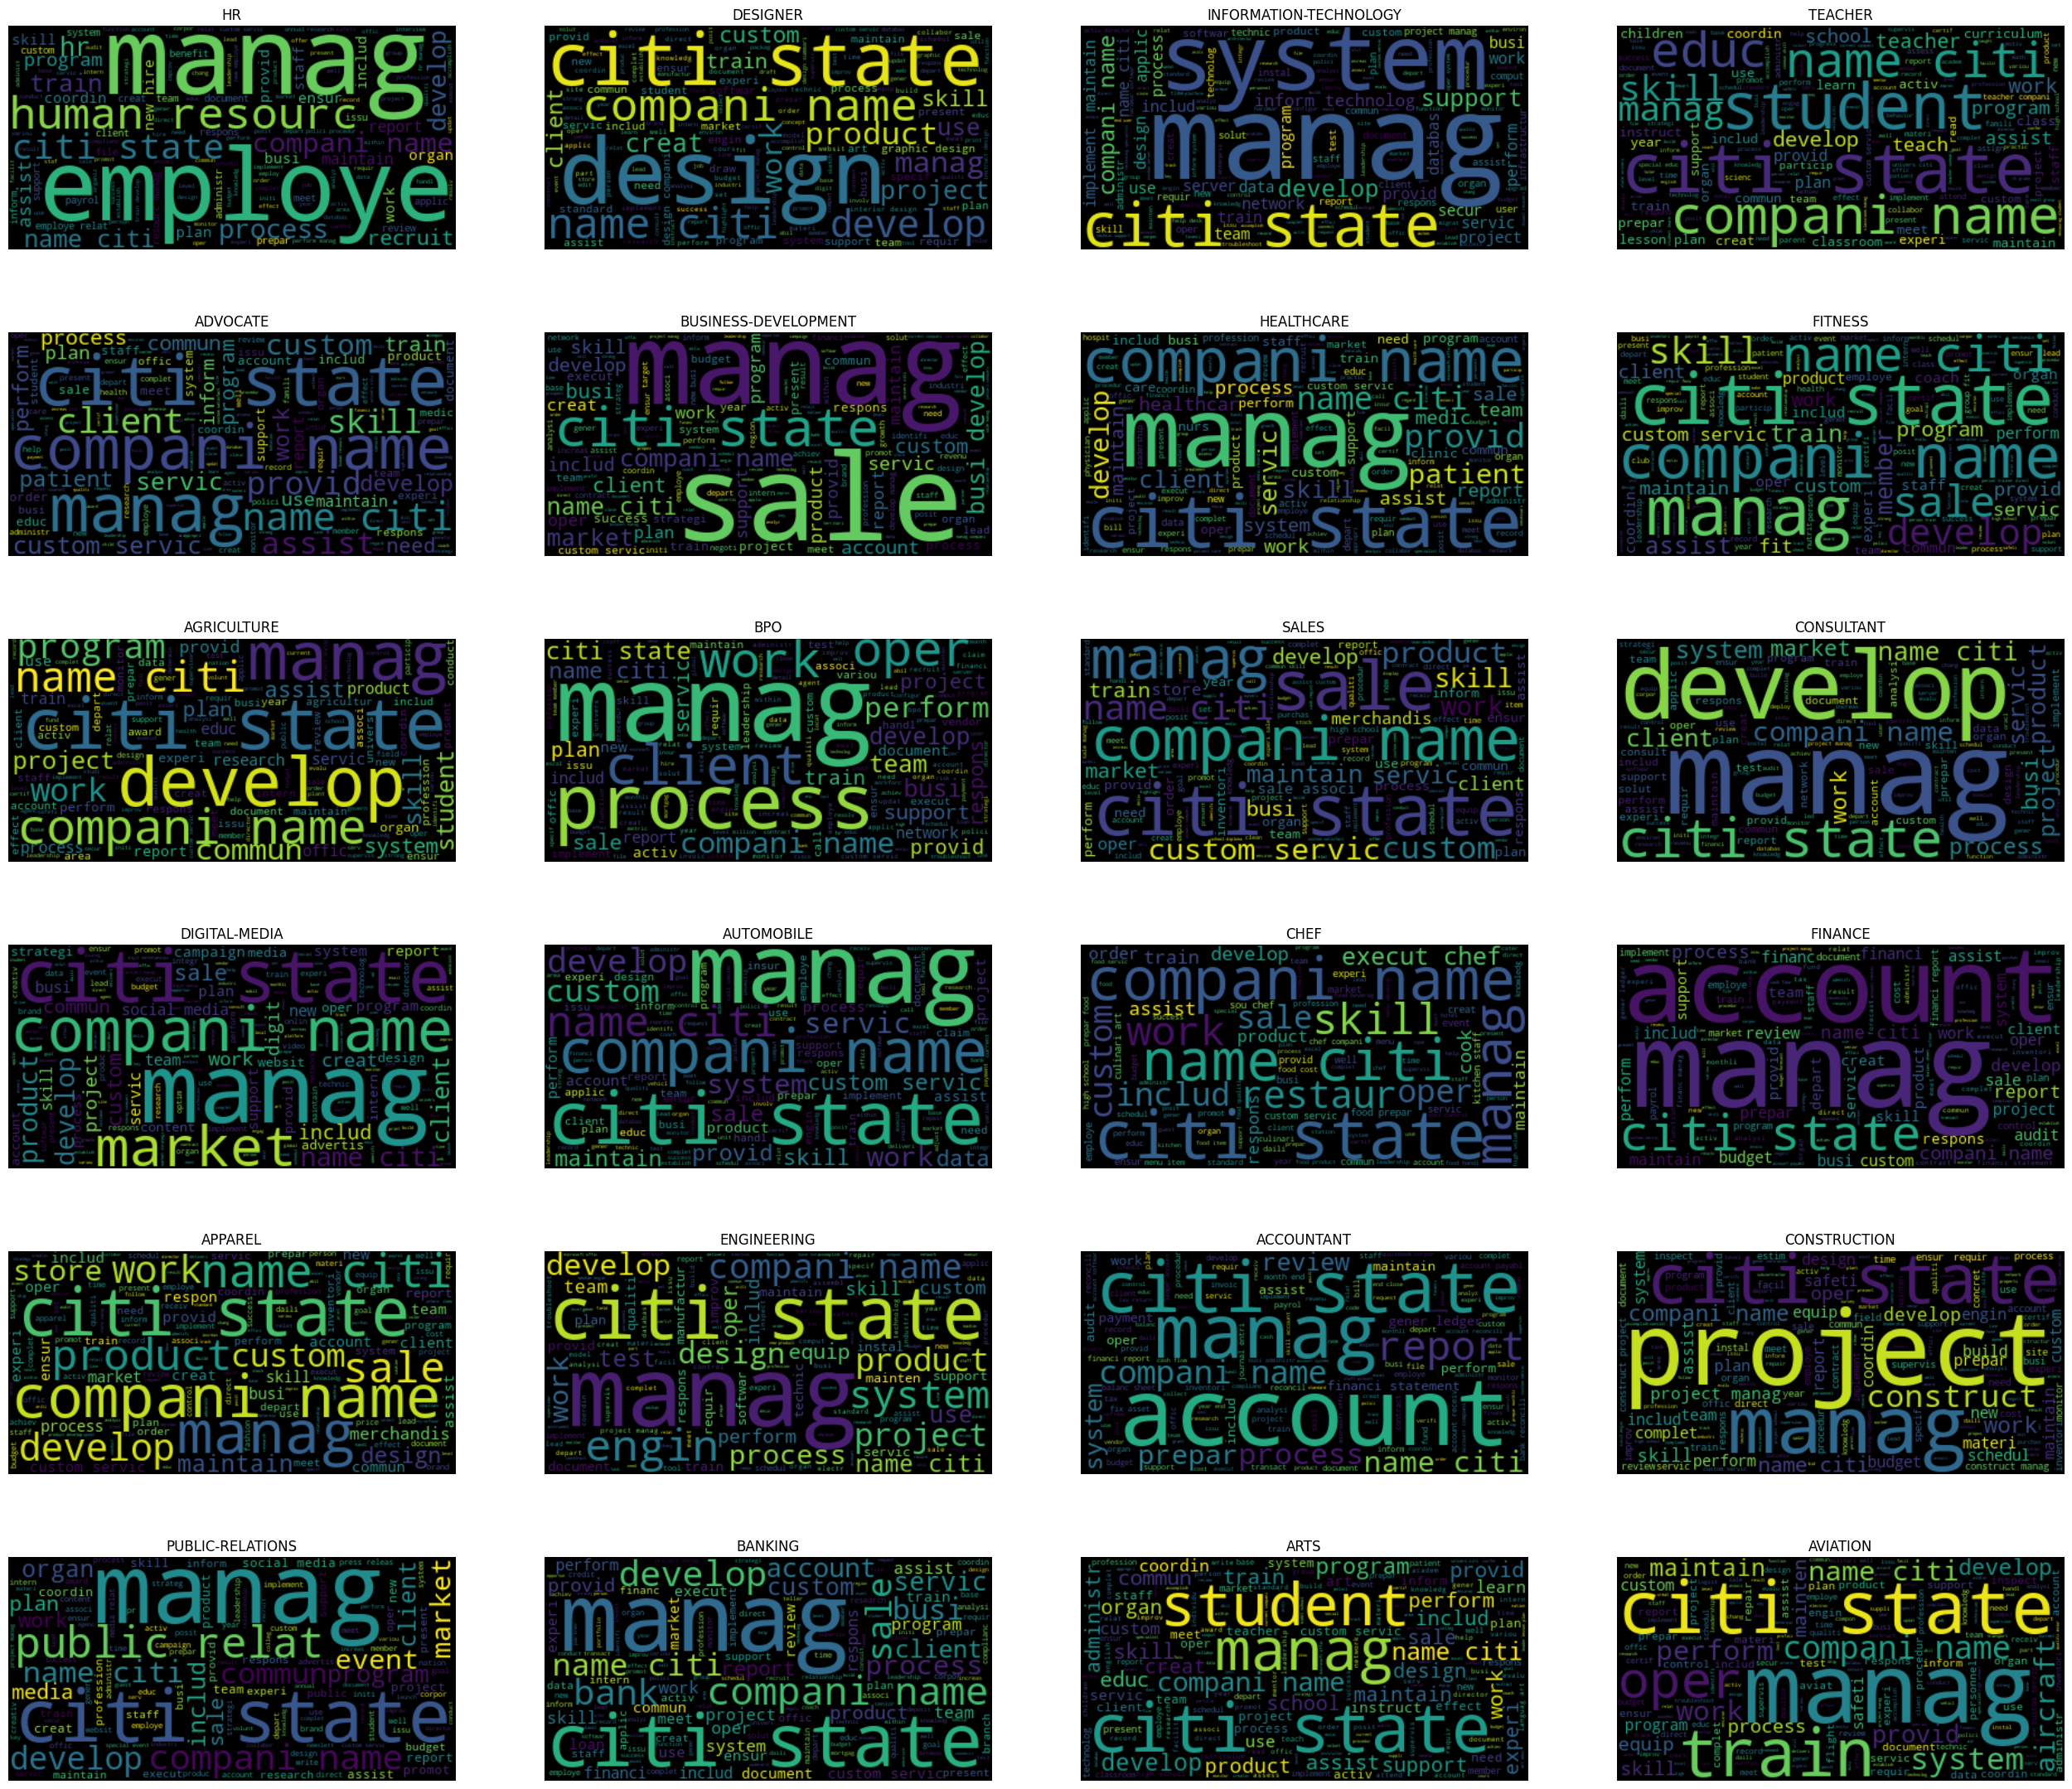

In [13]:
plt.figure(figsize=(32, 28))

for i, category in enumerate(categories):
    category_df = df.loc[df['Category'] == category]
    word_cloud = generate_word_cloud(category_df)

    plt.subplot(6, 4, i + 1).set_title(category)
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.plot()

plt.show()
plt.close()

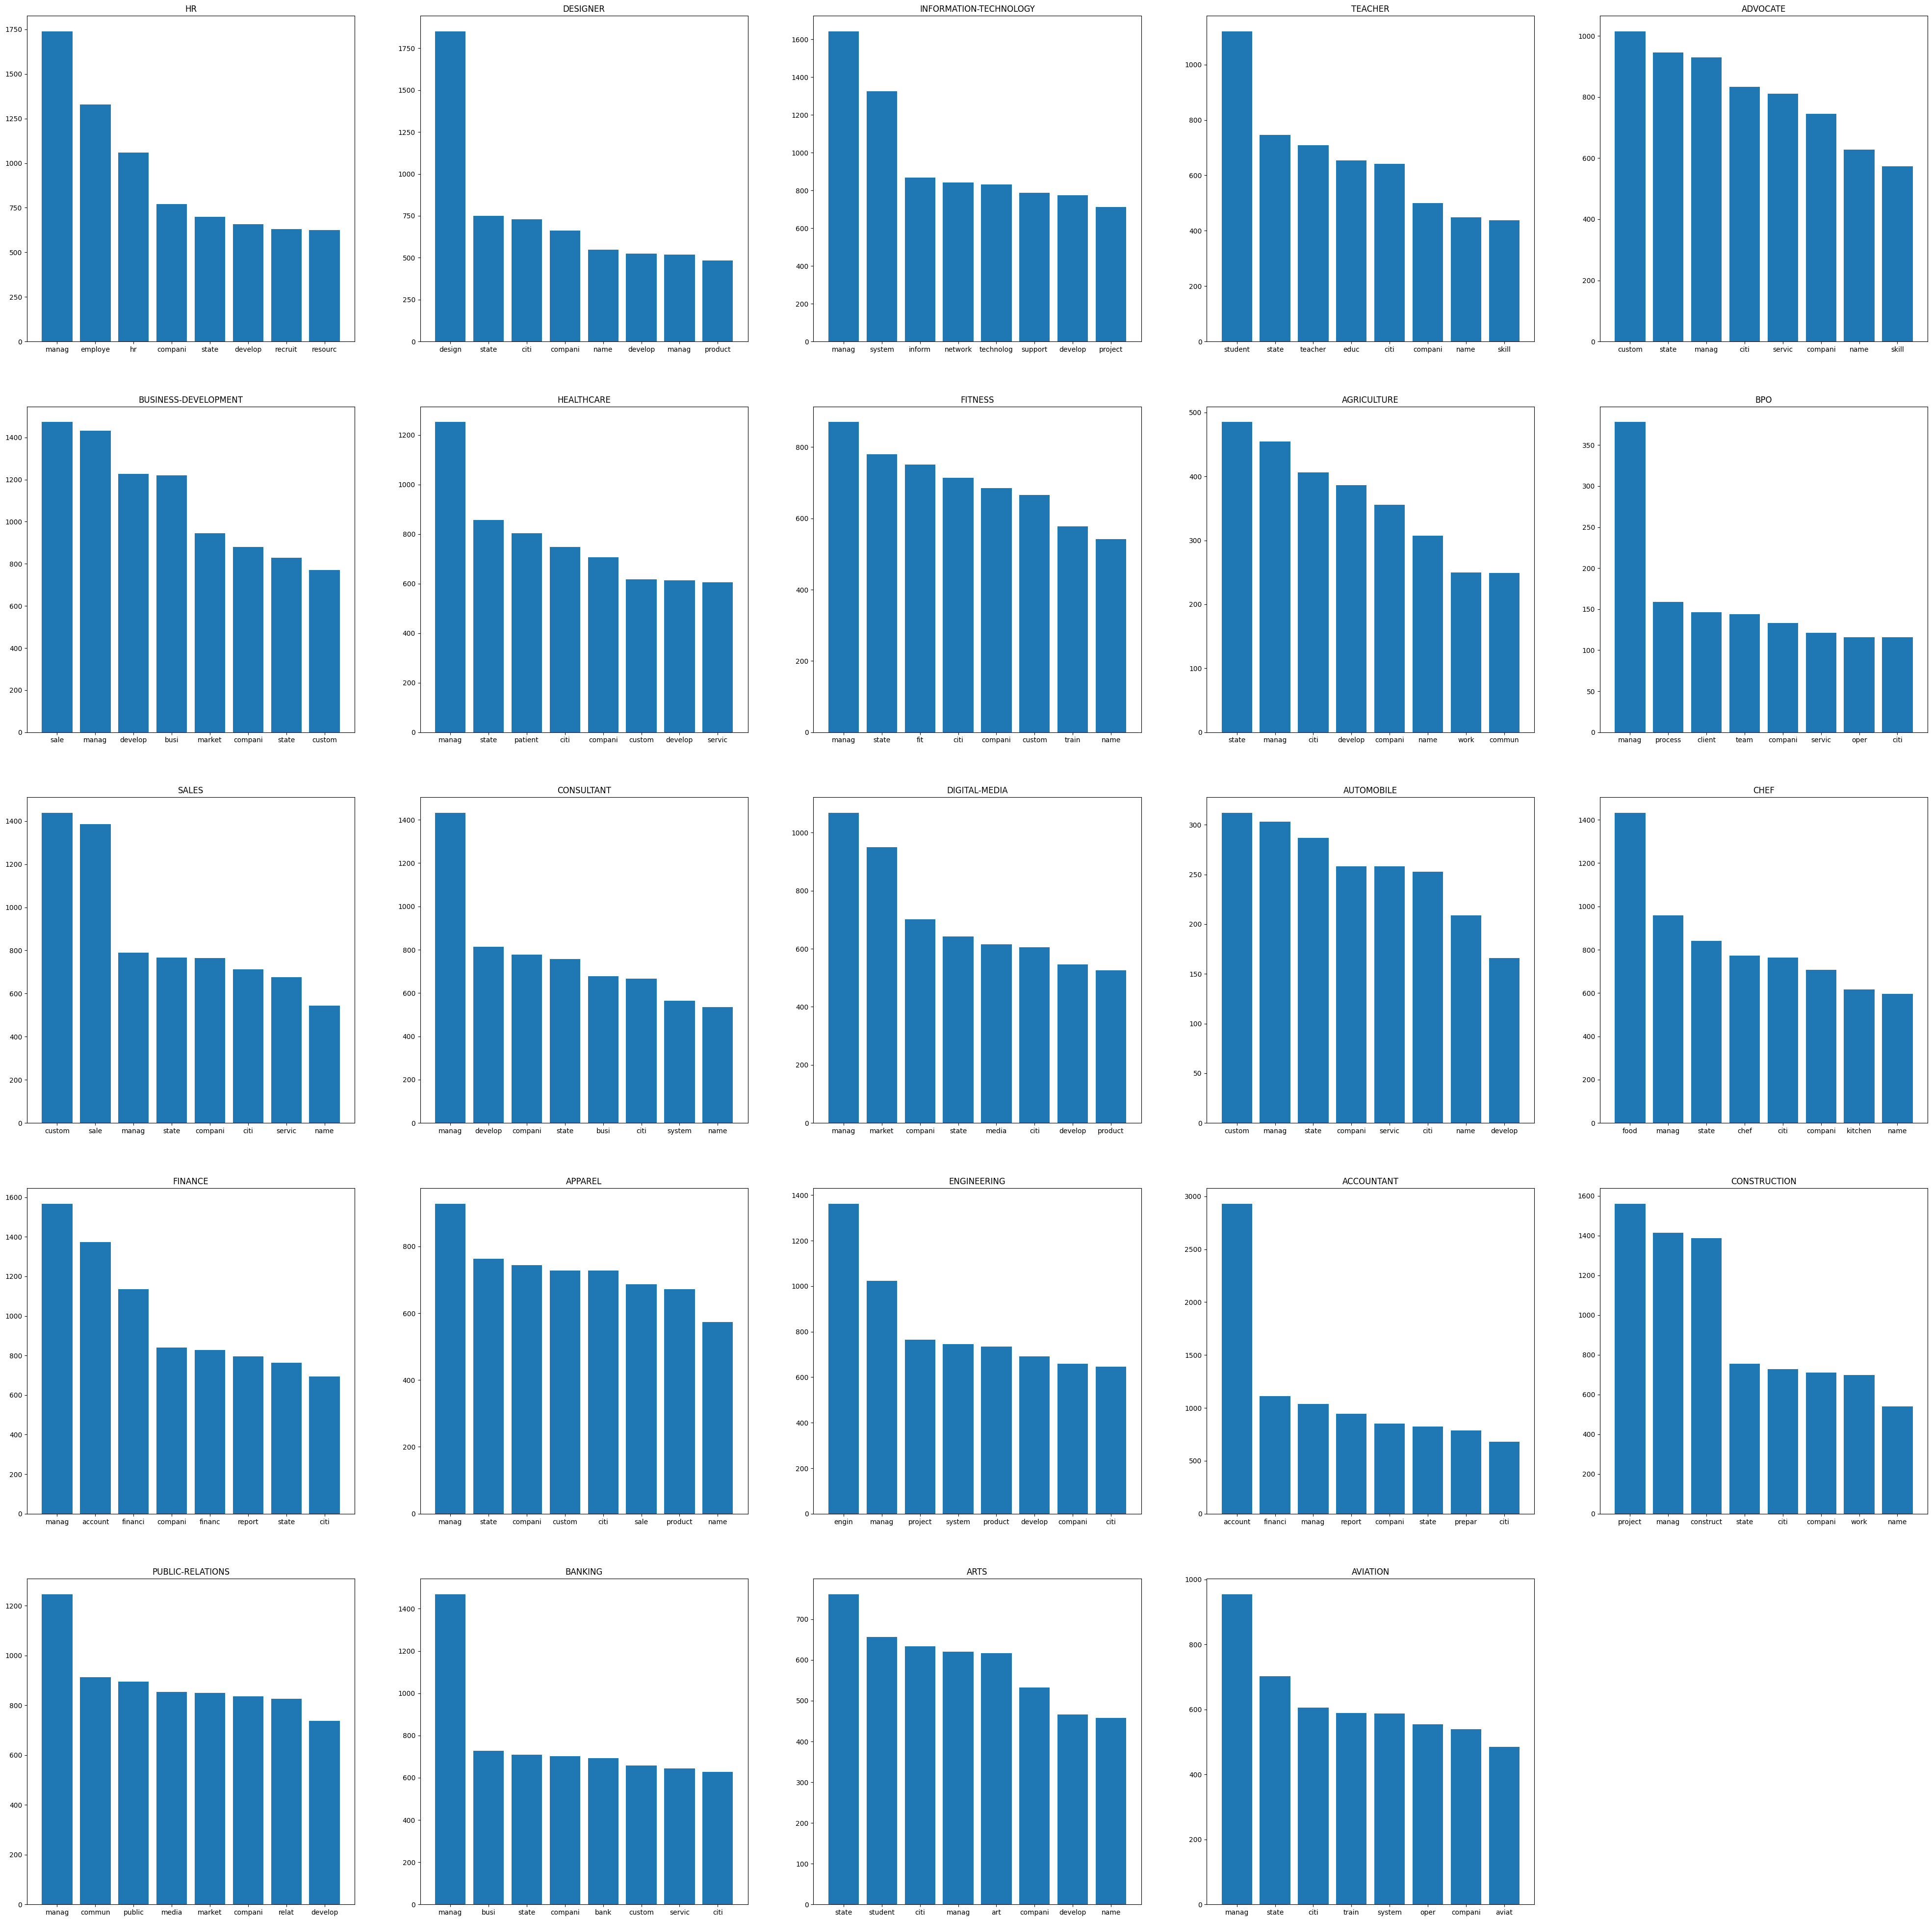

In [14]:
fig = plt.figure(figsize=(50, 50))

for i, category in enumerate(categories):
    category_df = df.loc[df['Category'] == category]
    count_df = category_df['processed_text'].str.split(expand=True).stack().value_counts().reset_index()
    count_df.columns = ['word', 'frequency']
    count_df.sort_values(by=['frequency'])
    count_df_10 = count_df.head(8)

    fig.add_subplot(5, 5, i + 1).set_title(category)
    plt.bar(count_df_10['word'], count_df_10['frequency'])

plt.show()
plt.close()

In [117]:
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
# from scipy.sparse import hstack

# resume_values = df['processed_text'].values

# word_vectorizer = TfidfVectorizer(
#     sublinear_tf=True,
#     stop_words='english'
# )
# word_vectorizer.fit(resume_values)
# word_vector = word_vectorizer.transform(resume_values)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(df['processed_text'])

CountVectorizer()

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df['processed_text'], df['Category'], test_size = 0.2)

In [13]:
transformed_train = vectorizer.transform(x_train).astype(float)
transformed_test = vectorizer.transform(x_test).astype(float)

In [14]:
print(transformed_train.shape)

(1987, 26812)


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier

model = OneVsRestClassifier(RandomForestClassifier(random_state=42, n_estimators=600, max_depth=12))
model.fit(transformed_train, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(max_depth=12,
                                                     n_estimators=600,
                                                     random_state=42))

In [17]:
print(f"train accuracy: {model.score(transformed_train, y_train)}")

train accuracy: 0.9949672873678913


In [18]:
pred = model.predict(transformed_test)
pred[:10]

array(['PUBLIC-RELATIONS', 'ADVOCATE', 'CONSTRUCTION',
       'INFORMATION-TECHNOLOGY', 'DIGITAL-MEDIA',
       'INFORMATION-TECHNOLOGY', 'CONSTRUCTION', 'SALES', 'TEACHER',
       'CONSTRUCTION'], dtype='<U22')

In [19]:
print(f"test accuracy: {model.score(transformed_test, y_test)}")

test accuracy: 0.6297786720321932


In [20]:
from sklearn import metrics
print(metrics.classification_report(y_test, pred))

                        precision    recall  f1-score   support

            ACCOUNTANT       0.57      0.78      0.66        27
              ADVOCATE       0.88      0.54      0.67        26
           AGRICULTURE       0.83      0.45      0.59        11
               APPAREL       0.64      0.58      0.61        12
                  ARTS       0.60      0.17      0.26        18
            AUTOMOBILE       1.00      0.12      0.22         8
              AVIATION       0.78      0.75      0.76        28
               BANKING       0.62      0.79      0.70        19
                   BPO       0.00      0.00      0.00         4
  BUSINESS-DEVELOPMENT       0.57      0.54      0.55        24
                  CHEF       0.56      0.83      0.67        24
          CONSTRUCTION       0.58      0.95      0.72        19
            CONSULTANT       0.25      0.04      0.07        24
              DESIGNER       0.73      0.76      0.74        21
         DIGITAL-MEDIA       0.64      

M:\resume-classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
M:\resume-classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
M:\resume-classifier\venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [120]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
df['encoded_category'] = le.fit_transform(df['Category'])

In [70]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# Tokenize feature data
vocab_size = 8000

text_tokenizer = Tokenizer(num_words=vocab_size)
text_tokenizer.fit_on_texts(X_train)


print(text_tokenizer.word_index)

train_feature_sequences = text_tokenizer.texts_to_sequences(X_train)
val_feature_sequences = text_tokenizer.texts_to_sequences(X_val)
test_feature_sequences = text_tokenizer.texts_to_sequences(X_test)

{'manag': 1, 'state': 2, 'compani': 3, 'citi': 4, 'develop': 5, 'custom': 6, 'name': 7, 'servic': 8, 'skill': 9, 'work': 10, 'account': 11, 'sale': 12, 'busi': 13, 'project': 14, 'product': 15, 'system': 16, 'train': 17, 'team': 18, 'process': 19, 'commun': 20, 'client': 21, 'new': 22, 'plan': 23, 'assist': 24, 'oper': 25, 'report': 26, 'includ': 27, 'market': 28, 'provid': 29, 'maintain': 30, 'experi': 31, 'design': 32, 'perform': 33, 'program': 34, 'support': 35, 'offic': 36, 'educ': 37, 'inform': 38, 'prepar': 39, 'use': 40, 'financi': 41, 'respons': 42, 'implement': 43, 'employe': 44, 'profession': 45, 'time': 46, 'staff': 47, 'administr': 48, 'ensur': 49, 'creat': 50, 'data': 51, 'need': 52, 'excel': 53, 'organ': 54, 'year': 55, 'student': 56, 'coordin': 57, 'relat': 58, 'qualiti': 59, 'budget': 60, 'engin': 61, 'univers': 62, 'activ': 63, 'document': 64, 'meet': 65, 'execut': 66, 'gener': 67, 'analysi': 68, 'schedul': 69, 'current': 70, 'member': 71, 'control': 72, 'improv': 73, 

In [45]:
print(train_feature_sequences)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [71]:
max_length = 300
pad_type = 'post'

train_feature_padded = pad_sequences(train_feature_sequences, maxlen=max_length, padding=pad_type, truncating=pad_type)
val_feature_padded = pad_sequences(val_feature_sequences, maxlen=max_length, padding=pad_type, truncating=pad_type)
test_feature_padded = pad_sequences(test_feature_sequences, maxlen=max_length, padding=pad_type, truncating=pad_type)

print(train_feature_padded[0])

[  13    5   66  135  132  637   12   45 2383   77    5  161  178  449
   12 1800  644  178  437 2812   13  645  535 7126  274  377   53   88
    9  959 2524  246   65  522   12  491  329   53   77   31  196  571
  255   11  878    1  154  252   21    5  495   12   68  161   23 1389
 1352   13    5   28  366   18  105  160   12   88  191   31    3    7
  492   70   13    5   66   42    1  757   12  678   11  330  211   18
   71 2136   63  612   11  109  272  612  214  493  169 1801   43   15
  191    8    6   76 1801  116  551 2485   15    8  191  212  851  413
 1760    5   43   13   23   21  110  169  455   35    8   15  432   11
   42  361  158  330  159  601  216  366   12 3697  288    6  320   23
   33   11  156  312   22   13    5   10  878  104  196  219  216  288
  296    5   23  366 2030 1066    1   33   93   74  399  432  734  771
   35    3    7  492  492   21  916    5   22   13  111  127   21  110
  438  119   28  530   27  641  103  345   88  599 3322 1226   21   15
 1365 

In [72]:
print(val_feature_padded[0])

[ 355  412  129  247  135  532   37 1263   55  384 1560  611  356  386
  107 1303   56  446 1620  258  674  273  197  771 1312  684   51   68
   40  258    1   16  338  248  196  415  406   94 1163 2922   45  742
  985   79   37   78  788  247  140   56  366  415  194  887  655  308
   50 4335 1679  666 4819   79   40 2530 1084 2679  351  247   80  447
   37   17  229  406   94  308  248 1807  702  840   55   40  318  258
  365  308 1413 1417   96  171  217   40 1583  316   73  258  248  318
  258 1192  848 1266   27  289  758   37   96 1266 1560  887  982  171
   18    9  275 6754 7263  464  718  922  496   43  922 2933  372   40
 1250  349   96 2098  479  937  385  312   37  334  902   55  990  578
  258   32   17   34  990 6141 4826 1293 6716  230   36  275  213  710
  174   51  493  229   10  236   71   45  197   20 2241    5  229  658
    2   87 1109  131 1284  420  128   31  355  412  129  247   70    3
    7    4    2  355  412  129  247    3    7    4    2  528  211  160
    3 

In [73]:
print(test_feature_padded[0])

[ 258  264  135 1009 1006   10   37   55   31  640  258   45    5   10
 1168  247 5748  666   36   37  640  211  258  264   29  207   35   45
    5  247   48  517    2 2039  438  152  689  960 1284  420    2  128
  280  813   17   43   94   40  496   31  258  264    3    7  145   97
  110   45    5   17  247   47  103  362  258 1284  420   43  107  159
  438  264   29   17   24  128  110  560   32   35   56 2268  495  355
  412  901  309  496  264    8   27  377  560  568   23  568  386  732
  744  684  160   35  689   43 7400  191  266  110  217   29  971 2295
  355  412  129 1126  513  165  347  120  229  243  432 4153  100  213
  896   85   36  226  454  613  954   61  113  487    3    7  640  211
  355  412  129    3    7  184   57  442 6657   14  513  343 6295  186
  380 1742   69   54   14  586   65  102  534  549 1742 1018   82  689
   57  184   57  585  170   35  442  281 4334 6031  380  170  195   69
  120  171  701  585 2597  948  187  385   45    5  380  310 1189  442
 7815 

In [62]:
Y_train

HR  DESIGNER  INFORMATION-TECHNOLOGY  TEACHER  ADVOCATE  \
611    0         0                       0        0         0   
726    0         0                       0        0         0   
35     1         0                       0        0         0   
1480   0         0                       0        0         0   
2249   0         0                       0        0         0   
...   ..       ...                     ...      ...       ...   
251    0         0                       1        0         0   
1595   0         0                       0        0         0   
952    0         0                       0        0         0   
1641   0         0                       0        0         0   
488    0         0                       0        0         1   

      BUSINESS-DEVELOPMENT  HEALTHCARE  FITNESS  AGRICULTURE  BPO  ...  CHEF  \
611                      1           0        0            0    0  ...     0   
726                      0           1        0            0    0  ...     0   
35                       0           0        0            0    0  ...     0   
1480                     0           0        0            0    0  ...     0   
2249                     0           0        0            0    0  ...     0   
...                    ...         ...      ...          ...  ...  ...   ...   
251                      0           0        0            0    0  ...     0   
1595                     0           0        0            0    0  ...     0   
952                      0           0        0            1    0  ...     0   
1641                     0           0        0            0    0  ...     0   
488                      0           0        0            0    0  ...     0   

      FINANCE  APPAREL  ENGINEERING  ACCOUNTANT  CONSTRUCTION  \
611         0        0            0           0             0   
726         0        0            0           0             0   
35          0        0            0           0             0   
1480        1        0            0           0             0   
2249        0        0            0           0             0   
...       ...      ...          ...         ...           ...   
251         0        0            0           0             0   
1595        0        1            0           0             0   
952         0        0            0           0             0   
1641        0        1            0           0             0   
488         0        0            0           0             0   

      PUBLIC-RELATIONS  BANKING  ARTS  AVIATION  
611                  0        0     0         0  
726                  0        0     0         0  
35                   0        0     0         0  
1480                 0        0     0         0  
2249                 0        1     0         0  
...                ...      ...   ...       ...  
251                  0        0     0         0  
1595                 0        0     0         0  
952                  0        0     0         0  
1641                 0        0     0         0  
488                  0        0     0         0  

[1738 rows x 24 columns]

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, LSTM

model = Sequential()
model.add(Embedding(vocab_size, 64, input_length=1))
model.add(LSTM(64))
model.add(Dense(64, activation='relu'))
model.add(Dense(24, activation='relu'))
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

model.build(train_feature_padded.shape)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 1, 64)             512000    
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 24)                1560      
                                                                 
Total params: 550744 (2.10 MB)
Trainable params: 550744 (2.10 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [75]:
history= model.fit(train_feature_padded, Y_train, epochs=40, validation_data=(val_feature_padded, Y_val), batch_size=128)

Epoch 1/40
14/14 [==============================] - 5s 283ms/step - loss: 7.0593 - accuracy: 0.0547 - val_loss: 5.4085 - val_accuracy: 0.0556
Epoch 2/40
14/14 [==============================] - 4s 266ms/step - loss: 4.9526 - accuracy: 0.0777 - val_loss: 4.8584 - val_accuracy: 0.0575
Epoch 3/40
14/14 [==============================] - 4s 272ms/step - loss: 4.4757 - accuracy: 0.1214 - val_loss: 4.6783 - val_accuracy: 0.0556
Epoch 4/40
14/14 [==============================] - 4s 266ms/step - loss: 4.2982 - accuracy: 0.0788 - val_loss: 4.7634 - val_accuracy: 0.0402
Epoch 5/40
14/14 [==============================] - 4s 263ms/step - loss: 4.2859 - accuracy: 0.0483 - val_loss: 4.7332 - val_accuracy: 0.0402
Epoch 6/40
14/14 [==============================] - 4s 270ms/step - loss: 4.1929 - accuracy: 0.0616 - val_loss: 4.7640 - val_accuracy: 0.0421
Epoch 7/40
14/14 [==============================] - 4s 267ms/step - loss: 3.8182 - accuracy: 0.1565 - val_loss: 4.6837 - val_accuracy: 0.0785
Epoch 